In [53]:
#importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns




In [54]:
#import dataset and show the beginning of the table
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

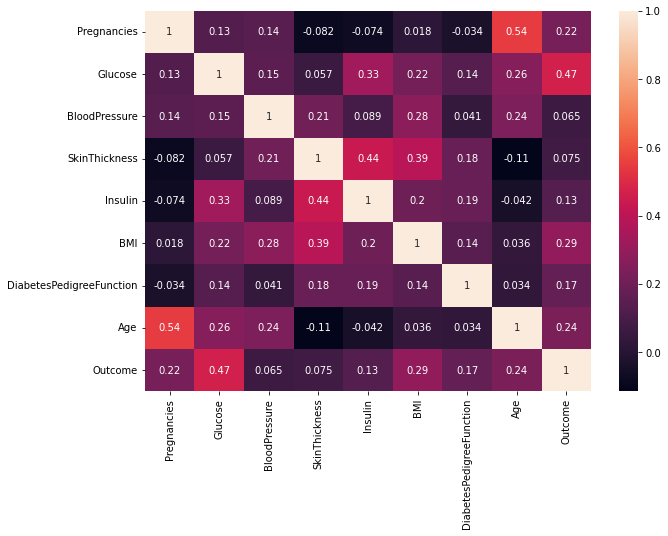

In [58]:
# Heatmap Visualization for Correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True) 

From the figure, the lightest tiles have the highest correlation. The variables that have correlations are pregnancies and age, glucose and outcome, skin thickness and insulin, and skin thickness and BMI.

The values of 1 are ignored since it is comparing the variables with themselves. 

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

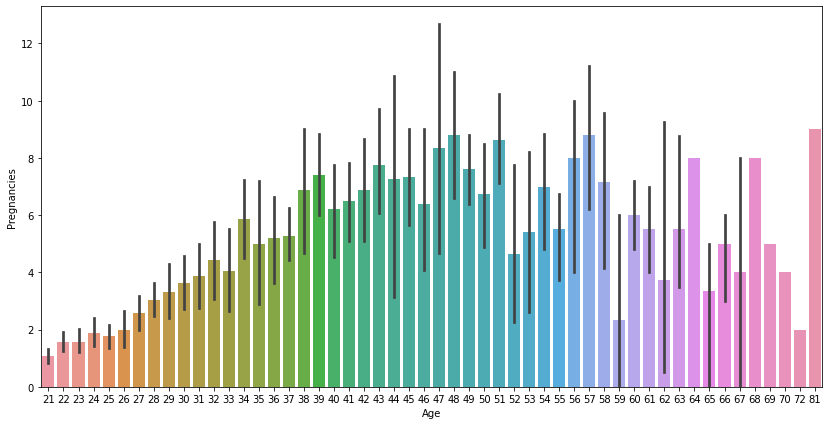

In [59]:
# Bar plot of Age vs. Pregnancies
plt.figure(figsize=(14,7))
sns.barplot(x='Age',y='Pregnancies', data=df)

This barplot demonstrates the relationship between age and pregnancies. There is a positive correlation with pregnancies increasing while age increases up until age 48. After age 48, as age increases pregnancies begin to stagnate and then decline.

[Text(0, 0, 'Mean:\n109.98'), Text(0, 0, 'Mean:\n141.26')]

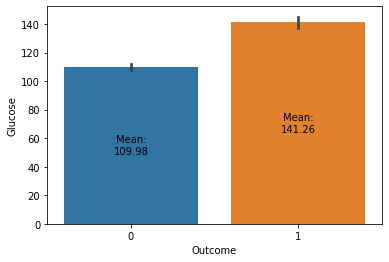

In [65]:
# Bar plot of Outcome vs. Glucose
ax=sns.barplot(x="Outcome",y="Glucose",data=df,)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')



The greatest predictor of diabetes outcomes (1= diabetes diagnosis; 0= no diabetes) is glucose level. There is a higher average of glucose levels (141.26) for those with diabetes than those without diabetes (109.98).

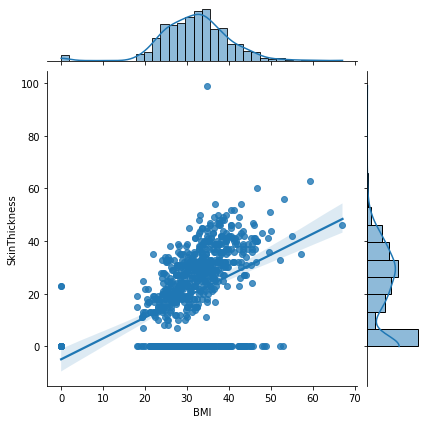

In [61]:
# Joint Grid of BMI vs. Skin Thickness
g= sns.JointGrid(y="SkinThickness",x="BMI",data=df)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)

There is a weak correlation between BMI and Skin Thickness. This graph is a linear regression, scatter plot, and histogram. Most of the values cluster in the middle within the range. In the next step, I will look at a boxplot and calculate the Interquartile Range (IQR) to investigate this further.

<AxesSubplot:xlabel='BMI'>

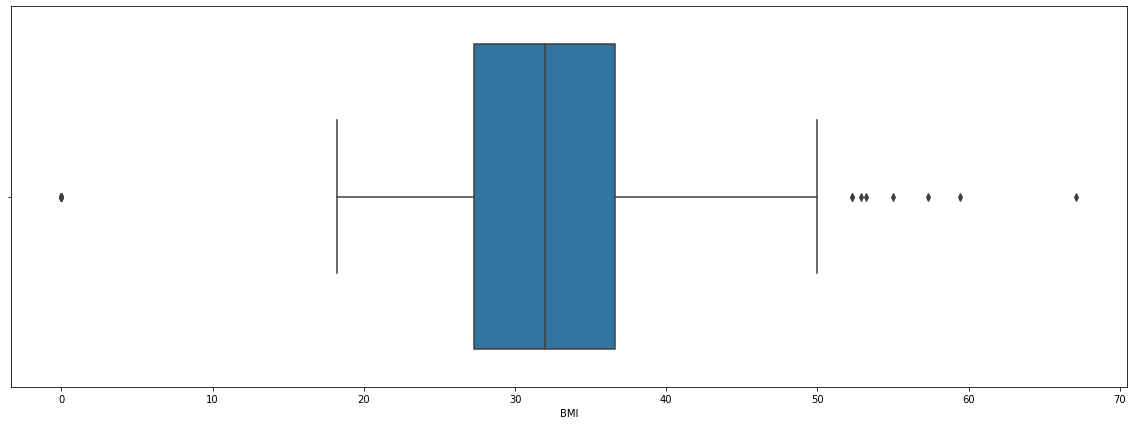

In [62]:
plt.figure(figsize=(20,7))
sns.boxplot(x="BMI",data=df)

In [92]:
#calculate interquartile range 
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

print("Q1:",Q1)
print("Q3:",Q3)

IQR= Q3-Q1

print ("IQR:",IQR)

Q1: 27.3
Q3: 36.6
IQR: 9.3


The interquartile range or middle 50% of the data set falls within the range of 27.3 and 36.6. The range is 9.3 BMI wide. In the box plot, there are 7 outliers that fall above 50 BMI.